#1. Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings #avoid warning flash
#import datetime
warnings.filterwarnings('ignore')

#2. Load dataset

In [ ]:
df = pd.read_excel('parking_data.xlsx')


In [ ]:
df.head()

,Date,Ambahnhof,Schlossberg
0,2016-06-21T08:05:46,39,290
1,2016-06-21T08:10:44,34,282
2,2016-06-21T08:15:09,30,269
3,2016-06-21T08:20:02,29,261
4,2016-06-21T08:25:04,29,259


In [ ]:
#Format data occupancy
df['Ambahnhof'] = pd.to_numeric(df['Ambahnhof'])
df['Schlossberg'] = pd.to_numeric(df['Schlossberg'])

# Feature engineering with the date
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date'] = df['Date'].dt.round('5min')  
df['Weekend'] = ((df.Date.dt.dayofweek) // 5 == 1).astype(float)
df['Weekday'] = df['Date'].apply(lambda x: x.weekday())
df[['Year','Month','Day','Hour','Min']] = pd.DataFrame([(x.year, x.month, x.day,x.hour,x.minute) for x in df['Date']])



#3. Data Cleaning 
3.2.1. Dropping duplicate values

3.2.2. Checking NULL values

3.2.3.Checking for 0 value

In [ ]:
#dropping duplicate values 
df=df.drop_duplicates()

In [ ]:
#check for missing values 
df.isnull().sum() 

#There is no missing values

Date           0
Ambahnhof      0
Schlossberg    0
Weekend        0
Weekday        0
Year           0
Month          0
Day            0
Hour           0
Min            0
dtype: int64

#4. Data Visualization


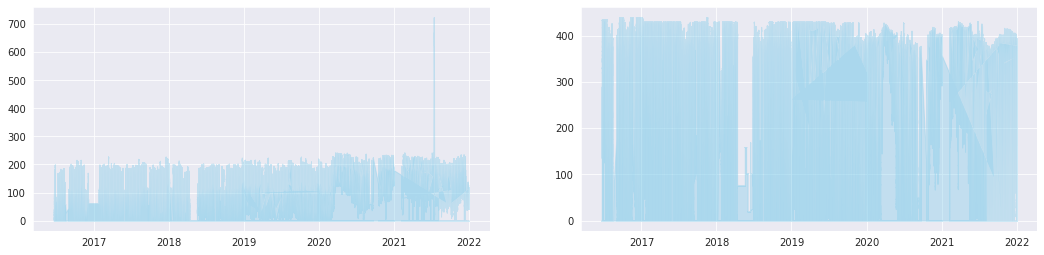

In [ ]:
#plot the occupancy for each parking
plt.figure(figsize=(18,14))
sns.set_style(style="darkgrid")

plt.subplot(3,2,1)
plt.fill_between(df['Date'], df['Ambahnhof'], color="skyblue", alpha=0.4)
plt.subplot(3,2,2)
plt.fill_between(df['Date'], df['Schlossberg'], color="skyblue", alpha=0.4)
plt.show()
 




In [ ]:
#Dataframe sumamry
df.describe()

,Ambahnhof,Schlossberg,Weekend,Weekday,Year,Month,Day,Hour,Min
count,548802.000000,548802.000000,548802.000000,548802.000000,548802.000000,548802.000000,548802.000000,548802.000000,548802.000000
mean,98.835613,294.213594,0.284819,2.995569,2018.689473,6.875642,15.776280,11.511562,27.523460
std,65.782084,129.321889,0.451328,1.998500,1.583791,3.362037,8.802509,6.910702,17.265535
min,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,51.000000,204.000000,0.000000,1.000000,2017.000000,4.000000,8.000000,6.000000,15.000000
50%,97.000000,349.000000,0.000000,3.000000,2019.000000,7.000000,16.000000,12.000000,30.000000
75%,147.000000,398.000000,1.000000,5.000000,2020.000000,10.000000,23.000000,18.000000,45.000000
max,725.000000,440.000000,1.000000,6.000000,2021.000000,12.000000,31.000000,23.000000,55.000000


**Conclusion:** According to the avilabable information of [Freiburg parking](https://www.parken-in-freiburg.de/bahnhofsgarage), the total capacity of `Ambahnhof`and `Schlossberg` are 272 and 516, respectively. 

Considering the max values for each parking in previous table, it can be observed that `Schlossberg` has not been completed in the historic data avilable. Instead, the max value for `Ambahnhof` was 725, higher than the total capacity.

In [ ]:
#Count number times with Ambahnhof Occupancy higher that total capacity
(df['Ambahnhof'] > 272).sum()




252

**Conclusion:** There are 252 values higher than `Ambahnhof` total capacity. This can be also observed in the following boxplots.

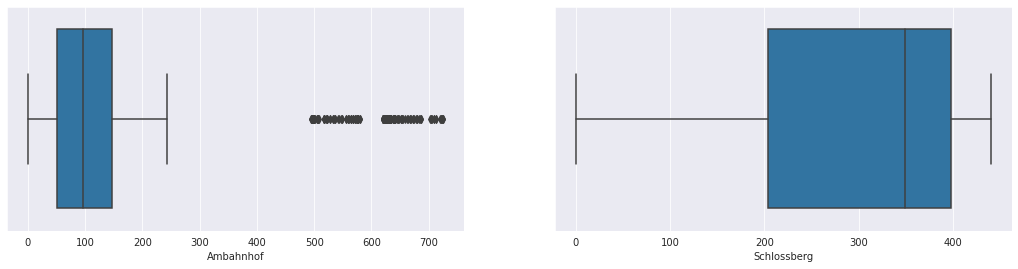

In [ ]:
#Boxplot for outliers identification
plt.figure(figsize=(18,14))
sns.set_style(style="darkgrid")

plt.subplot(3,2,1)
sns.boxplot(x='Ambahnhof',data=df)
plt.subplot(3,2,2)
sns.boxplot(x='Schlossberg',data=df)


**Conclusion:** The overrall boxplot indicates that `Ambahnhof` presentes multiple outliers (quartile). This fact is no observed for `Schlossberg`.

A deeper analysis of outliers registration is performed in the following boxplot.

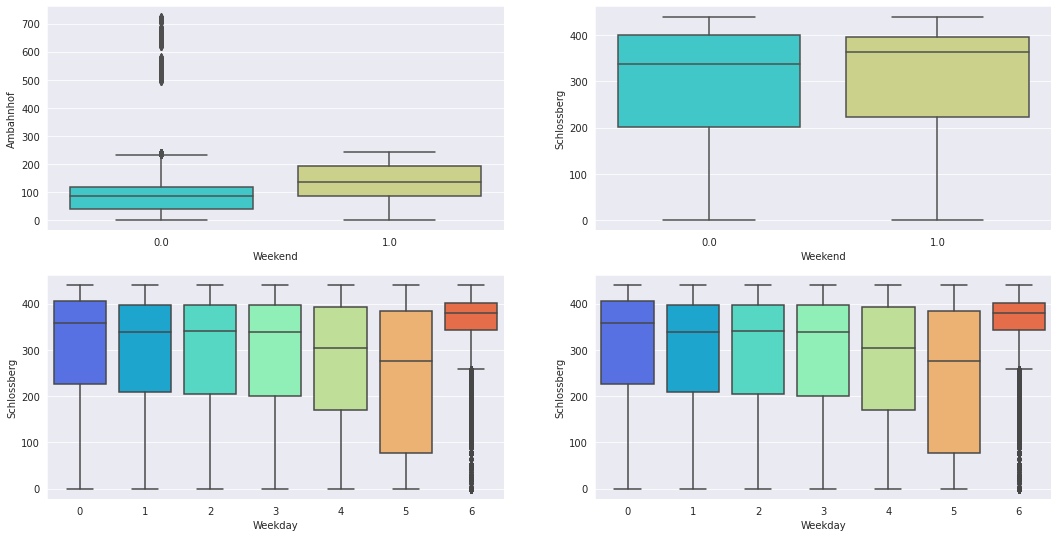

In [ ]:
plt.figure(figsize=(18,14))
sns.set_style(style="darkgrid")

plt.subplot(3,2,1)
sns.boxplot(x="Weekend", y='Ambahnhof', data=df,palette='rainbow')
plt.subplot(3,2,2)
sns.boxplot(x="Weekend", y="Schlossberg", data=df,palette='rainbow')
plt.subplot(3,2,3)
sns.boxplot(x="Weekday", y="Schlossberg", data=df,palette='rainbow')
plt.subplot(3,2,4)
sns.boxplot(x="Weekday", y="Schlossberg", data=df,palette='rainbow')






**Conclusion:** The outliers of `Ambahnhof` occur at weekend (0), particularly on Sunday(6). This findig apply for both parking garage.

More importantion can be obtained analysing the outliers for different years.

In [ ]:
#df['Weekend'].value_counts()

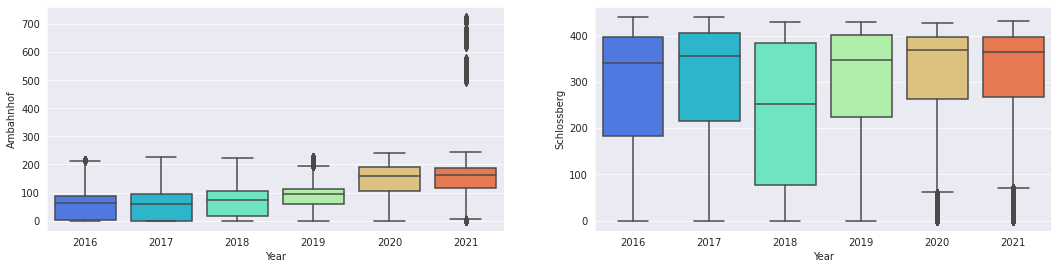

In [ ]:
plt.figure(figsize=(18,14))
sns.set_style(style="darkgrid")

plt.subplot(3,2,1)
sns.boxplot(x="Year", y='Ambahnhof', data=df,palette='rainbow')
plt.subplot(3,2,2)
sns.boxplot(x="Year", y="Schlossberg", data=df,palette='rainbow')

**Conclusion:** The hugh amount of outliers occurs in 2019 and 2021 for `Ambahnhof`, and  2020 and 2021, for `Schlossberg`.

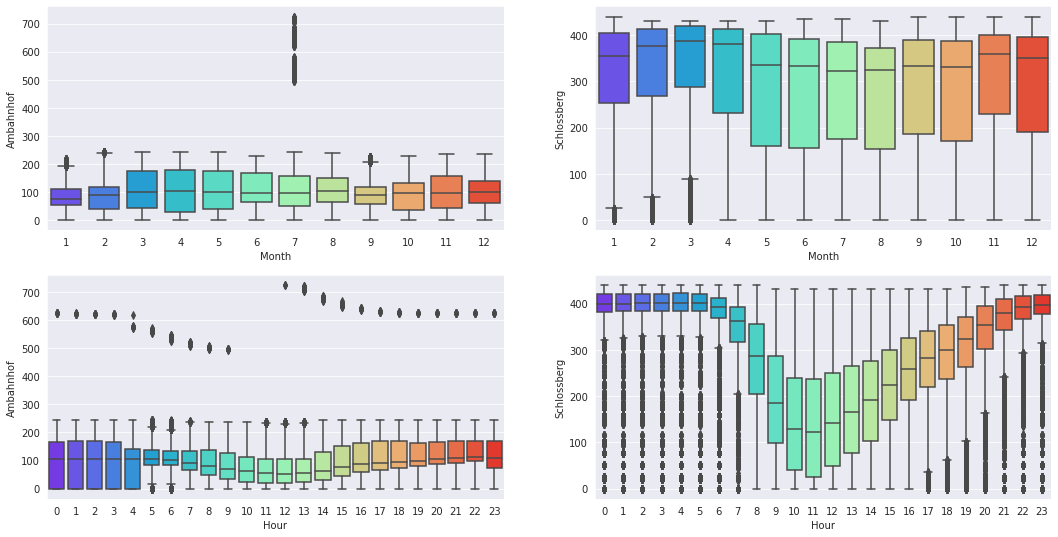

In [ ]:
plt.figure(figsize=(18,14))
sns.set_style(style="darkgrid")

plt.subplot(3,2,1)
sns.boxplot(x="Month", y='Ambahnhof', data=df,palette='rainbow')
plt.subplot(3,2,2)
sns.boxplot(x="Month", y="Schlossberg", data=df,palette='rainbow')
plt.subplot(3,2,3)
sns.boxplot(x="Hour", y='Ambahnhof', data=df,palette='rainbow')
plt.subplot(3,2,4)
sns.boxplot(x="Hour", y="Schlossberg", data=df,palette='rainbow')
#sns.set(rc = {'figure.figsize':(15,8)})

**Conclusion**: The major number of outliers are observed in July for `Ambahnhof`, and between 0-9 and 12-23 h.

**Conclusion:** `Schlossberg` parking shows an opposite beahbior, where the majority of outliers take place on cold months (January, Febraruary and March). Also, outliers are observed outside the time range 8-16 h. This could be understood in terms of Schlossberg sport is a city 
center with turistic recurrency. The reduction of occupancy in working hours may be explained with the hypothesis that the majority of parking spots are used by workers near the site. Thus, releasing the spot during working hours. However, this trend is modified during the winter, where outliers during the most cold hours are observed, indicanting a season behavior.

**Conclusion** Considerin the previous analysis, it could be inferred that weather forecast and holyday have a strong effect on the studied parking garages.

#5. Feature Engineering



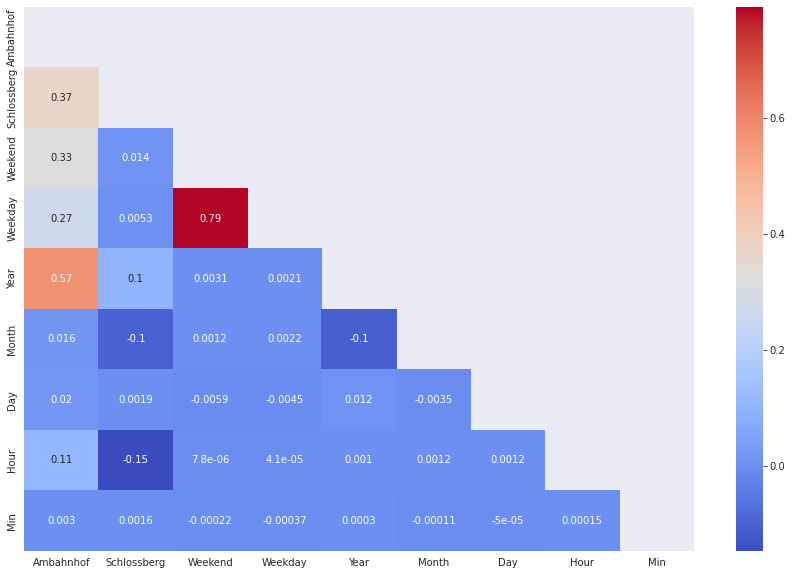

In [ ]:
df = df.sort_values(by='Date',ascending=True)
df.loc[df['Ambahnhof'] > 278, 'Ambahnhof'] = 278
plt.figure(figsize=(15, 10))
df_corr = df.corr()
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask= mask)

plt.show()

**Conclusion:** From the correlation matrix heatmap can be observed that the features with more predective power in decreasing order are:
- `Ambahnhof`: Year (0.57), Weekend (0.33), Weekday (0.27), and Hour (0.11).
- `Schlossberg`: Hour (-0.15), Month(-0.1) and Year (0.1).

The minute time base exhibited the lowest correlation coefficient for both parking garage with five minutes rounding.

Matrix correlation heatmap is performed again testing a 30 minutes rounding

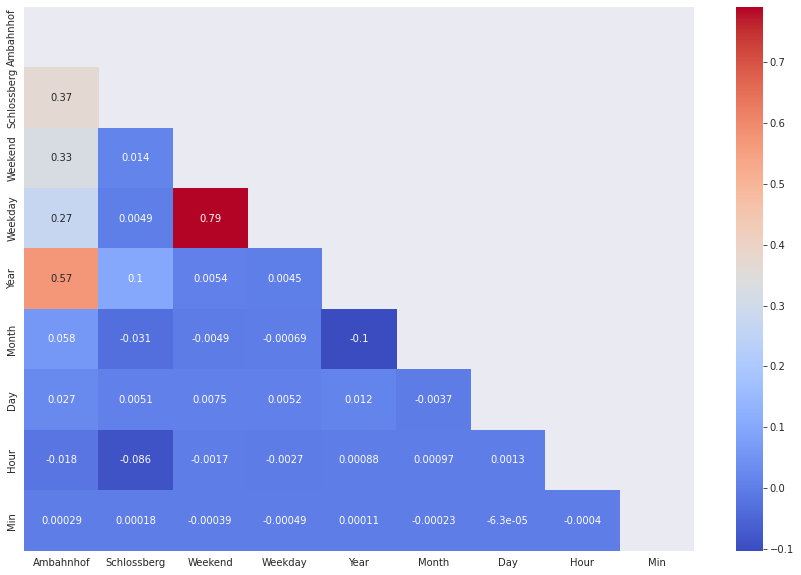

In [ ]:
df_r30 = df.drop(['Min'],axis=1)
df_r30['Date'] = df_r30['Date'].dt.round('30min')  
df_r30['Weekend'] = ((df_r30.Date.dt.dayofweek) // 5 == 1).astype(float)
df_r30['Weekday'] = df_r30['Date'].apply(lambda x: x.weekday())
df_r30[['Year','Month','Day','Hour','Min']] = pd.DataFrame([(x.year, x.month, x.day,x.hour,x.minute) for x in df_r30['Date']])

plt.figure(figsize=(15, 10))
df_corr_r30 = df_r30.corr()
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df_corr_r30 , cmap="coolwarm", annot=True, mask= mask)

plt.show()

**Conclusion:** No major variations in correlation coefficient between parking occupancy and variable time expressed in minutes using 30 min rounding was observed. Thus, the time es formatted in hour basis to simplified the case study. This also contributes to lign the weather forecast data.

According to previous analysis, the following features of raw data are selected Year, Month, Weekend, Weekday, and Hour.


In [ ]:

#df.drop(['Date', 'Min'], axis = 1, inplace = True) 
df.head()


,Date,Ambahnhof,Schlossberg,Weekend,Weekday,Year,Month,Day,Hour,Min
0,2016-06-21 08:05:00,39,290,0.0,1,2016,6,21,8,5
1,2016-06-21 08:10:00,34,282,0.0,1,2016,6,21,8,10
2,2016-06-21 08:15:00,30,269,0.0,1,2016,6,21,8,15
3,2016-06-21 08:20:00,29,261,0.0,1,2016,6,21,8,20
4,2016-06-21 08:25:00,29,259,0.0,1,2016,6,21,8,25


Extra data considering weather features and holidays has been added.

Weather historic data was obtained from [Meteostat](https://meteostat.net/en/station/10803?t=2017-05-03/2022-05-25). The features tag are the following:
- **Date:** Date.
-	**Tavg:** Avg. Temperature.
- **Tmin:**	Min. Temperature.
- **Tmax:**	Max. Temperature.
- **Prcp:**	Total Precipitation (y/n).
- **Freezing:**	Freezing temperature and Snow register (y/n).
- **wspd:** Avg.	Wind Speed (km/h)
- **wpgt:**	Peak Gust (km/h)

The maximum total precipitation in the historic data was 48.7 mm, with a average of 2.09. Considering this variation, `Prcp` and `Freezing` features are adopted as binary variables.

The Baden-Württemberg Public Holidays Register was obtained from [Public Holidays](https://publicholidays.de/baden-wurttemberg/). `Holiday` was adopted as a binary variable for the especific day (y/n).


In [ ]:
#Load extra data (weather and holyday)
df_extra = pd.read_excel('extra_data.xlsx')

#Split year, month and day
df_extra['Date'] = df_extra['Date'].astype('datetime64[ns]')
df_extra[['Year','Month','Day']] = pd.DataFrame([(x.year, x.month, x.day) for x in df_extra['Date']])
df_ec = df_extra.drop(['Date'],axis=1)

#df_ec.head()
df_ec.shape


(2020, 11)

In [ ]:
df.dtypes

Date           datetime64[ns]
Ambahnhof               int64
Schlossberg             int64
Weekend               float64
Weekday                 int64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Min                     int64
dtype: object

In [ ]:
df_ec.dtypes

Holiday       int64
Tavg        float64
Tmin        float64
Tmax        float64
Prcp          int64
Freezing      int64
Wspd        float64
Wpgt        float64
Year          int64
Month         int64
Day           int64
dtype: object

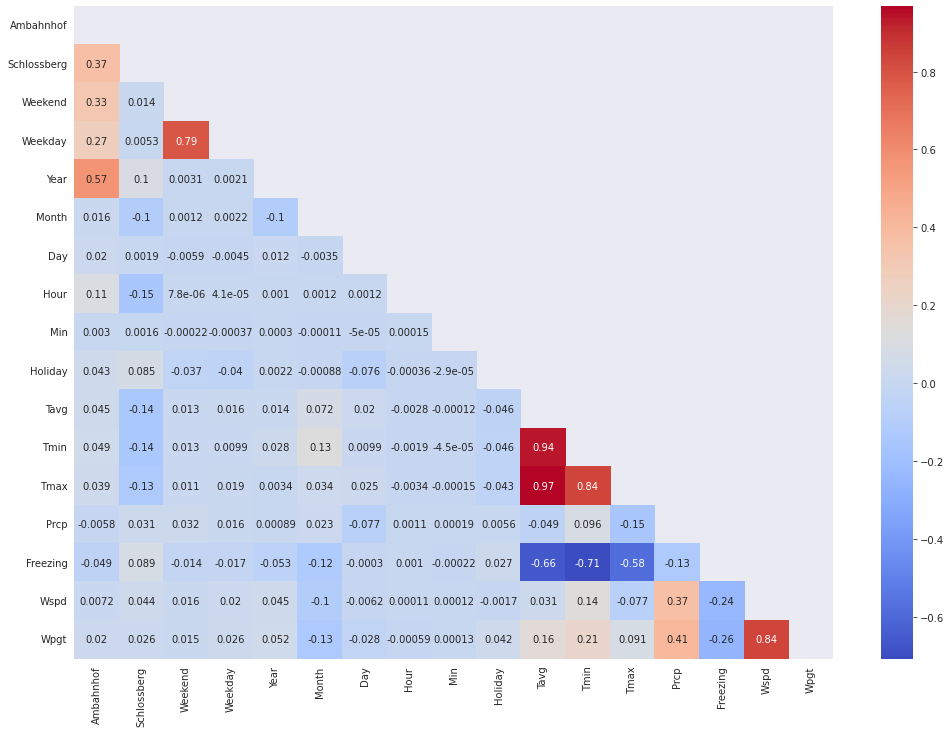

In [ ]:
#merge parking and weather dataset
df_merged = df.merge(df_ec,how='left')

#Matrix correlation heatmap of merged detaframe
plt.figure(figsize=(17, 12))
df_merged_corr = df_merged.corr()
mask = np.triu(np.ones_like(df_merged.corr()))
sns.heatmap(df_merged_corr , cmap="coolwarm", annot=True, mask=mask)

plt.show()

As it can observed, the `Ambahnhof` occupancy is mainly correlated to the `Year`, `Weekend`, `Weekday`, and `Hour`. On the other hand, no strong correlation with weather features was observed (Tavg, Tmin, Tmax, Prcp, Freezing, Wspd, and Wpgt).

In contrast, `Schlossberg` occupancy is correlated with time basis variables (daily hour, month, and year), and weather features, specially with Tmax, Tmin, and Tavg.
It is noteworthy that both parking garages are covered.

Regarding `Holiday`,`Schlossberg` exhibited the double correlation coeficient compared to `Ambahnhof` occupancy. However, this feature does not present a relevant correlation with the label outcome under the conditions covered in this work.


**Conclusion:** From the correlation matrix heatmap can be observed that the features with more predective power in decreasing order are:
- `Ambahnhof`: Year (0.57), Weekend (0.33), Weekday (0.27), and Hour (0.11).
- `Schlossberg`: Hour (-0.15), Tmax (-0.14), Tmin(-0.14), Tavg(-0.13), Month(-0.1) and Year (0.1).

In [ ]:
#Selection of features with more predective power for model development
df_model = df_merged.drop(['Date', 'Day', 'Min', 'Holiday', 'Prcp', 'Freezing','Wspd','Wpgt'], axis=1)
df_model.shape

(548802, 10)

#6.Handling Outliers
Outliers are unusual values in the dataset, which can distort statistical analyses. Removing outliers can cause data loss. In this case, it is required used various scaling and transformation techniques.

*Quantile Transformer* is a robust preprocessing method able to transform the features following an uniform or a normal distribution. Thus, this transformation tends to spread out the most frequent values, reducing the effect of marginal outliers



**Conclusion:** 

In [ ]:
from sklearn.preprocessing import QuantileTransformer
column_names = list(df_model.columns)

x=df_model
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)

df_quantile=quantile.transform(X)
df_quantile=pd.DataFrame(X)
df_quantile.columns = column_names
df_quantile.head()

,Ambahnhof,Schlossberg,Weekend,Weekday,Year,Month,Hour,Tavg,Tmin,Tmax
0,0.210711,0.380380,0.0,0.213714,0.0,0.40991,0.354855,0.779279,0.870871,0.68969
1,0.194194,0.367868,0.0,0.213714,0.0,0.40991,0.354855,0.779279,0.870871,0.68969
2,0.181682,0.347347,0.0,0.213714,0.0,0.40991,0.354855,0.779279,0.870871,0.68969
3,0.178178,0.335836,0.0,0.213714,0.0,0.40991,0.354855,0.779279,0.870871,0.68969
4,0.178178,0.332833,0.0,0.213714,0.0,0.40991,0.354855,0.779279,0.870871,0.68969


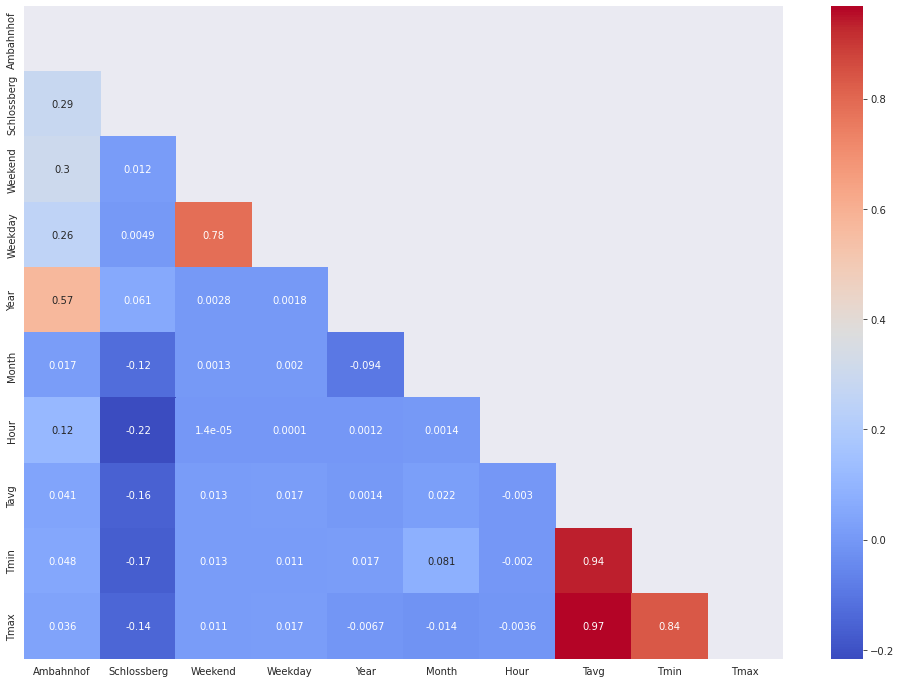

In [ ]:
#Matrix correlation heatmap of with Quantile processing
plt.figure(figsize=(17, 12))
df_quantile_corr = df_quantile.corr()
mask = np.triu(np.ones_like(df_quantile.corr()))
sns.heatmap(df_quantile_corr , cmap="coolwarm", annot=True, mask=mask)

plt.show()

**Conclusion:** slight variations in correlation coefficient of selected variables through Quantile Processing were observed. The changes are shown in the following table.
     

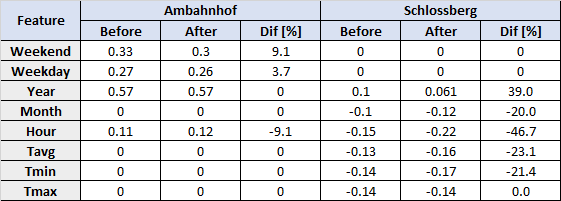

**Conclusion:** Higher variations in `Schlossberg` correlation coeficient were observed compared to `Ambahnhof`. A reduction of 39% in the correlation coeficient for `Schlossberg`-`Year` was obtained employing Quantile Processing. The selection feature criteria employed in this work is indicated by a correlation coeficient higher than 0.1. In this way, `Schlossberg`-`Year` does not represent a strong correlation for predective model building.

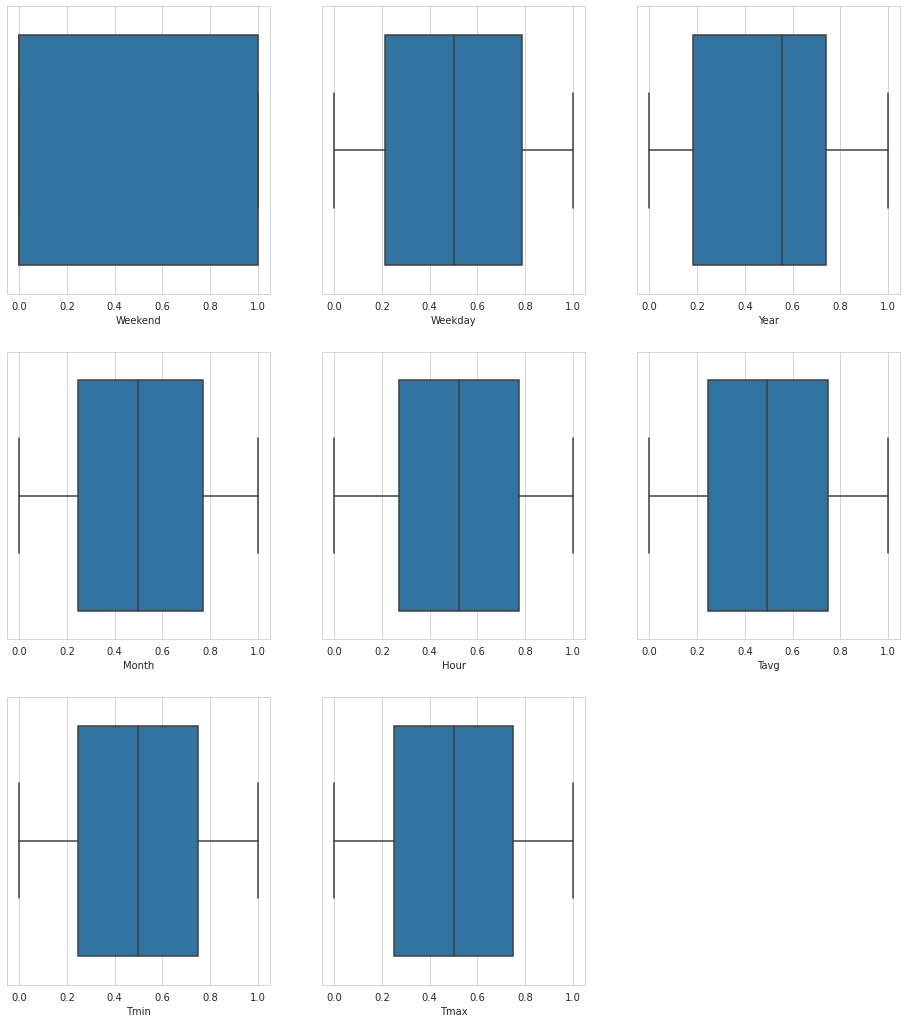

In [ ]:
#Test outliers with boxplot
plt.figure(figsize=(16,18))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x=df_quantile['Weekend'],data=df_quantile)
plt.subplot(3,3,2)
sns.boxplot(x=df_quantile['Weekday'],data=df_quantile)
plt.subplot(3,3,3)
sns.boxplot(x=df_quantile['Year'],data=df_quantile)
plt.subplot(3,3,4)
sns.boxplot(x=df_quantile['Month'],data=df_quantile)
plt.subplot(3,3,5)
sns.boxplot(x=df_quantile['Hour'],data=df_quantile)
plt.subplot(3,3,6)
sns.boxplot(x=df_quantile['Tavg'],data=df_quantile)
plt.subplot(3,3,7)
sns.boxplot(x=df_quantile['Tmin'],data=df_quantile)
plt.subplot(3,3,8)
sns.boxplot(x=df_quantile['Tmax'],data=df_quantile)

**Conclusion:** The effect of marginal outliers was minimized for all selected features using Quantile Processing methodology

#7. Timeseries Analysis



In [ ]:
import pandas as pd
df = pd.read_excel('parking_data.xlsx')



In [ ]:
df.head()

,Date,Ambahnhof,Schlossberg
0,2016-06-21T08:05:46,39,290
1,2016-06-21T08:10:44,34,282
2,2016-06-21T08:15:09,30,269
3,2016-06-21T08:20:02,29,261
4,2016-06-21T08:25:04,29,259


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df = df.sort_values(by='Date',ascending=True)
df.loc[df['Ambahnhof'] > 278, 'Ambahnhof'] = 278
#df= df.drop(['Schlossberg'],axis=1)

In [ ]:
df.head()

,Date,Ambahnhof,Schlossberg
0,2016-06-21,39,290
116,2016-06-21,74,362
117,2016-06-21,76,368
118,2016-06-21,83,368
119,2016-06-21,77,366


In [ ]:
# Check time intervals
df['delta'] = df['Date'] - df['Date'].shift(1)
df[['Date', 'delta']].head()

,Date,delta
0,2016-06-21,NaT
116,2016-06-21,0 days
117,2016-06-21,0 days
118,2016-06-21,0 days
119,2016-06-21,0 days


In [ ]:
df['delta'].sum(), df['delta'].count()

(Timedelta('2019 days 00:00:00'), 550202)

In [ ]:
#Check for missing values
df = df.drop('delta', axis=1)
df.isna().sum()

Date           0
Ambahnhof      0
Schlossberg    0
dtype: int64

In [ ]:
 #seasonalities using statsmodels’ seasonal_decompose function. 
 #This function will decompose our time series into trend, seasonality and noise
 from statsmodels.tsa.seasonal import seasonal_decompose
 def decompose_parking_occupancy(df, share_type='Ambahnhof', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()


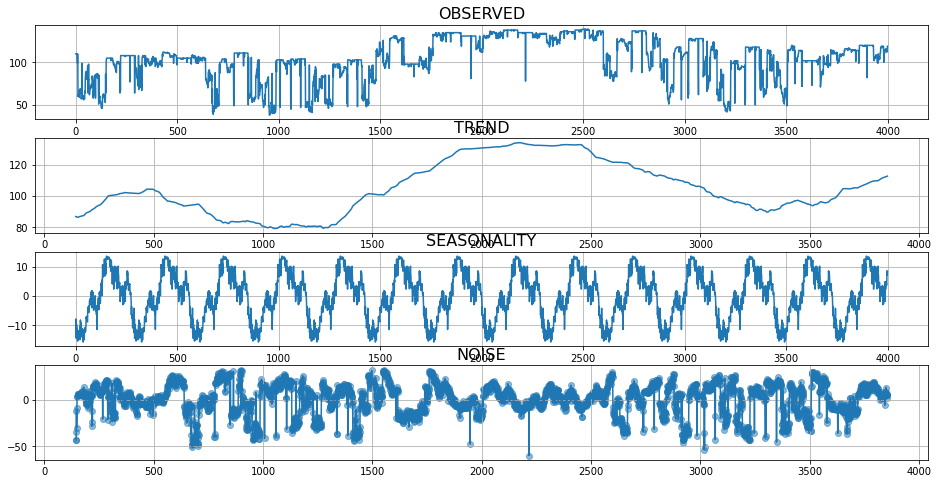

In [ ]:
decompose_parking_occupancy(df,samples=4000,period=288)

In [ ]:
df.head()

,Date,Ambahnhof,Schlossberg
0,2016-06-21,39,290
116,2016-06-21,74,362
117,2016-06-21,76,368
118,2016-06-21,83,368
119,2016-06-21,77,366


#7.1. Prophet

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
column_names = ['Ambahnhof',	'Schlossberg']
Date = df['Date']

x=df.drop(['Date'],axis=1)
quantile  = QuantileTransformer()
X= quantile.fit_transform(x)

df_quantile=quantile.transform(X)
df_quantile=pd.DataFrame(X)
df_quantile.columns = column_names
df_quantile.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,Ambahnhof,Schlossberg
0,0.212212,0.379880
1,0.364865,0.540040
2,0.373373,0.564064
3,0.408408,0.564064
4,0.378378,0.556056


In [ ]:
df_quantile['Date']=Date
df=df_quantile
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df = df.sort_values(by='Date',ascending=True)
df['Date'].dtypes

dtype('O')

In [ ]:
df.describe()

,Ambahnhof,Schlossberg
count,550203.000000,550203.000000
mean,0.495690,0.500800
std,0.294628,0.288585
min,0.000000,0.000000
25%,0.249750,0.251251
50%,0.501502,0.500000
75%,0.750250,0.754254
max,1.000000,1.000000


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from prophet import Prophet
from prophet.plot import plot_plotly

In [ ]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
univariate_df = df[['Date', 'Ambahnhof']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))



467672 82531


In [ ]:
# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Calculate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.3195469189239761


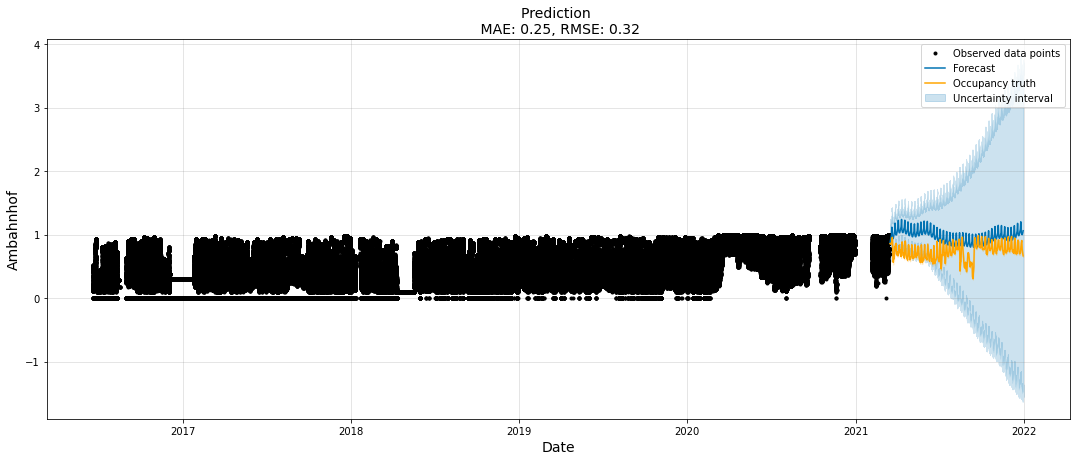

In [ ]:
# Plot the forecast
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Occupancy truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Ambahnhof', fontsize=14)

plt.show()

 It can be observed the daily seasonal pattern with three peeks and a valley between them. Furthermore, there is still a lot of noise that is not explained by daily seasonality. thus, it is checked if data is autoregressive.